<font color='green'>**IMPORT LIBRARIES**</font>

In [6]:
########################################################################################################
# IMPORT LIBRARIES
########################################################################################################
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import cov
from scipy.stats import pearsonr
from scipy.stats import spearmanr

<font color='green'>**Read dataset obtained from previous step where usability score is calculated**</font>

In [30]:
########################################################################################################
# Read dataset obtained from previous step where usability score is calculated
########################################################################################################
toyData=pd.read_csv("Toys_and_Games.csv");

In [24]:
toyData.head(3)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,PreProcessed_reviewText,subjectivity_score,flesch_index,polarity_score,entropy_score,DaleChall_Index,helpful_ratio,lex_diversity,normalized_Flesch_Index,normalized_polarity,normalized_entropy_score,normalized_DaleChall_Index,usability_score
0,439893577,"[1, 1]",4,Love the magnet easel... great for moving to d...,"03 28, 2014",A8R62G708TSCM,love the magnet easel great for moving to diff...,0.65,8.3,0.433333,4.459432,7.588870,0.75,1.000000,0.002016,0.685185,0.492417,0.213488,0.210848
1,439893577,"[1, 1]",5,Both sides are magnetic. A real plus when you...,"01 28, 2013",A21KH420DK0ICA,both sides are magnetic a real plus when your...,0.45,29.4,0.333333,5.497670,6.688048,0.20,0.684211,0.011906,0.629630,0.621443,0.187834,0.126823
2,439893577,"[0, 0]",5,Bought one a few years ago for my daughter and...,"02 8, 2014",AR29QK6HPFYZ4,bought one a few years ago for my daughter and...,0.45,10.7,0.250000,4.389365,7.461429,0.50,0.741935,0.003141,0.583333,0.483709,0.209859,0.151268


<font color='green'>**Make groups of dataset based on distinct values  of column 'overall' and compute average values of each semantic score for each group**</font>

In [35]:
########################################################################################################
# Make groups of dataset based on distinct values  of column 'overall' and compute average values of
# each semantic score for each group
########################################################################################################
groupedData=toyData.groupby(['overall']).mean()
groupedData

,subjectivity_score,flesch_index,polarity_score,entropy_score,DaleChall_Index,helpful_ratio,lex_diversity,normalized_Flesch_Index,normalized_polarity,normalized_entropy_score,normalized_DaleChall_Index,usability_score
overall,,,,,,,,,,,,
1,0.498307,39.478395,0.006938,5.566256,7.147515,0.657133,0.751811,0.016630,0.448299,0.629967,0.200919,0.100186
2,0.491076,50.199444,0.051941,5.739856,7.167192,0.677664,0.719178,0.021655,0.473300,0.651541,0.201479,0.098532
3,0.495355,53.017318,0.095333,5.718806,7.199060,0.682421,0.719210,0.022976,0.497407,0.648925,0.202387,0.104650
4,0.492489,50.562156,0.145604,5.680474,7.239290,0.696406,0.730898,0.021825,0.525336,0.644161,0.203533,0.111074
5,0.501870,39.164559,0.198158,5.447336,7.240570,0.684973,0.761638,0.016483,0.554532,0.615188,0.203569,0.125660


<font color='green'>**Add column 'overall' to grouped data**</font>

In [36]:
########################################################################################################
# Add column 'overall' to grouped data
########################################################################################################
groupedData['overall']=[1,2,3,4,5]

<font color='green'>**Visualize line plot on grouped data for 'usability_score' column vs 'overall' column**</font>

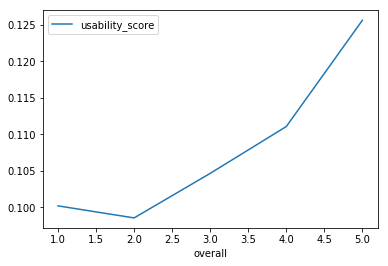

In [37]:
########################################################################################################
# Visualize line plot on grouped data for 'usability_score' column vs 'overall' column
########################################################################################################
lines=groupedData.plot.line(x='overall',y='usability_score')

<font color='green'>**Compute covariance between 'overall' and 'usability_score' columns**</font>

In [46]:
########################################################################################################
# Compute covariance between 'overall' and 'usability_score' columns
########################################################################################################
covariance = cov(toyData['overall'].astype(int).values, toyData['usability_score'])
print(covariance)

[[0.91065581 0.00811494]
 [0.00811494 0.00238004]]


<font color='green'>**Compute pearson correlation between 'overall' and 'usability_score' columns**</font>

In [47]:
########################################################################################################
# Compute pearson correlation between 'overall' and 'usability_score' columns
########################################################################################################
corr, _ = pearsonr(toyData['overall'].astype(int).values, toyData['usability_score'])
print('Pearsons correlation between rating ans usability score is: %.3f' % corr)

Pearsons correlation between rating ans usability score is: 0.174


<font color='green'>**Compute spearnmans correlation between 'overall' and 'usability_score' columns**</font>

In [48]:
########################################################################################################
# Compute spearnmans correlation between 'overall' and 'usability_score' columns
########################################################################################################
corr, _ = spearmanr(toyData['overall'].astype(int).values, toyData['usability_score'])
print('Spearmans correlation between rating ans usability score is: %.3f' % corr)

Spearmans correlation between rating ans usability score is: 0.185


<font color='green'>**Visualize distplot of 'subjectivity_score' column**</font>

C:\Users\adite\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


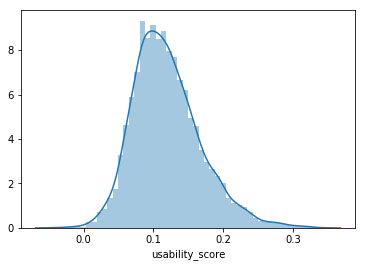

In [44]:
########################################################################################################
# Visualize distplot of 'subjectivity_score' column
########################################################################################################
sns.distplot(toyData.usability_score)
plt.show()